# PCA

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
import mglearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline 

## Ejemplo introducción

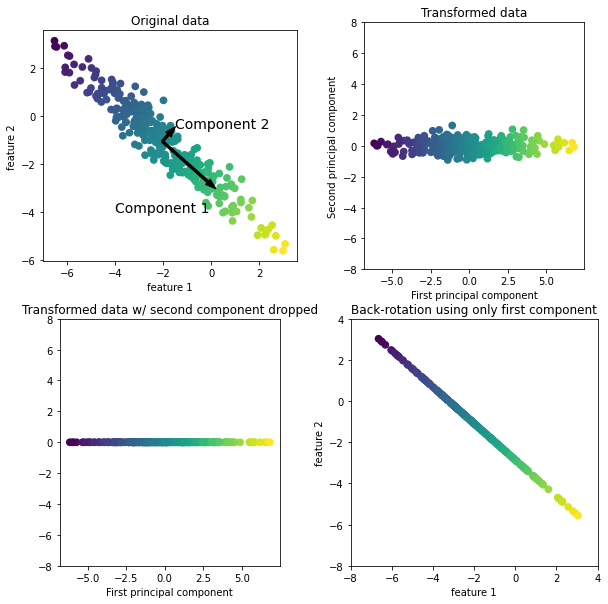

In [3]:
mglearn.plots.plot_pca_illustration()

In [4]:
cancer=load_breast_cancer()

In [5]:
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
infoCancer = pd.DataFrame(data, columns=columns)

In [6]:
cancer.feature_names.shape

(30,)

In [7]:
infoCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [8]:
pca=PCA(n_components=2)
pca.fit(cancer.data)

PCA(n_components=2)

In [9]:
transformada=pca.transform(cancer.data)

In [10]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'PCA 2')

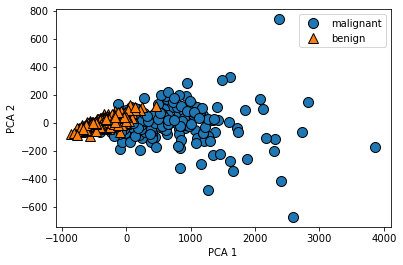

In [11]:
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Ejemplo Iris

El set de datos iris de 4 dimensiones, haremos una reduccion para poder visualizarlo en 2 dimensiones.

In [13]:
sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

### Carga de datos de iris

In [14]:
iris = sns.load_dataset("iris")
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualizando las especies

![title](iris-machinelearning.png)

## Estandarizando la informacion

Es necesario realizar feature scaling (lograr que tengan media = 0 y varianza = 1), para que performe correctamente PCA. Para ello usaremos un *StandardScaler* provisto por sklearn, pero podria plantearse como una etapa de pre procesamiento de los datos.



In [15]:
# separando los features y estandarizando
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Aplicando PCA para proyectar a 2D

In [16]:
from sklearn.decomposition import PCA
# en este caso aplicamos PCA indicando la cantidad de componentes 
# que queremos, 2, para representar en 2 dimensiones.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
# reconstruimos el data frame para poder representarlo
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
# concatenamos los valores de species para poder reconstruir el set de datos.
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

In [18]:
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


# Visualizando la informacion reducida en 2D

Podemos plantear la siguiente visualizacion realizando un plot en 2 dimensiones con la informacion obtenida de tal forma que podamos realizar un analisis en 2D de la informacion de 4 dimensiones.

Un aspecto a tener en cuenta que luego de la reduccion de dimensiones, usualmente no hay un significado especifico asignado a cada principal component. Estas son dos nuevas dimensiones principales de variacion de los datos.

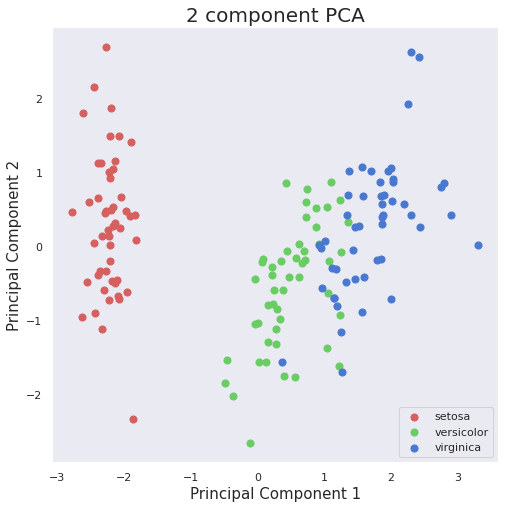

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Observaciones

A partir del plot podemos ver claramente que hay una separacion entre las 3, en particular entre setosa y versicolor y virginica.

# Total Variance y Explained Variance

La "total variance" es la suma de las varianzas de cada componente principal

La "explained variance" indica cuanta varianza (cuanta informacion) se "conserva" y/o puede ser atribuida a cada componente principal.

In [20]:
print("Explained Variance", pca.explained_variance_)

Explained Variance [2.93808505 0.9201649 ]


In [21]:
print("Explained Variance ratio",pca.explained_variance_ratio_)

Explained Variance ratio [0.72962445 0.22850762]


In [22]:
print("Varianza acumulada", sum(pca.explained_variance_ratio_))

Varianza acumulada 0.9581320720000164


A partir de los atributos de PCA podemos ver cuanta acumula cada una de las principal components y vemos que en su totalidad la representacion acumula un 95.80% de varianza (informacion).

# Cómo utilizar SVD para llegar al mismo resultado que PCA

## (1) Debemos estandarizar los datos de forma tal que tengan media 0 y varianza 1

In [23]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.loc[:, features].values
x = StandardScaler().fit_transform(x)

## (2) Se calcula la matriz de covarianza

In [24]:
n = 150 ## es el numero de observaciones del set (num de filas)
x_cov_matrix = np.dot(x.T,x) / 150.0

## (3) Se aplica la SVD sobre la matriz de covarianza

In [25]:
u, s, vt = np.linalg.svd(x_cov_matrix, full_matrices=True)

## (4) Se eligen las K componentes que se quieran utilizar y luego se proyectan los puntos sobre Vt

In [26]:
k = 2
vt_k_eigenvector = vt[:k,:]
data_in_k_dimensions = np.dot(x,vt_k_eigenvector.T)
data_in_k_dimensions.shape

(150, 2)

## (5) Se pueden graficar los resultados obtenidos

In [27]:
principalDf = pd.DataFrame(data = data_in_k_dimensions
             , columns = ['First Eigenvector', 'Second Eigenvector'])
# concatenamos los valores de species para poder reconstruir el set de datos.
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)
finalDf.head()

,First Eigenvector,Second Eigenvector,species
0,2.264703,-0.480027,setosa
1,2.080961,0.674134,setosa
2,2.364229,0.341908,setosa
3,2.299384,0.597395,setosa
4,2.389842,-0.646835,setosa


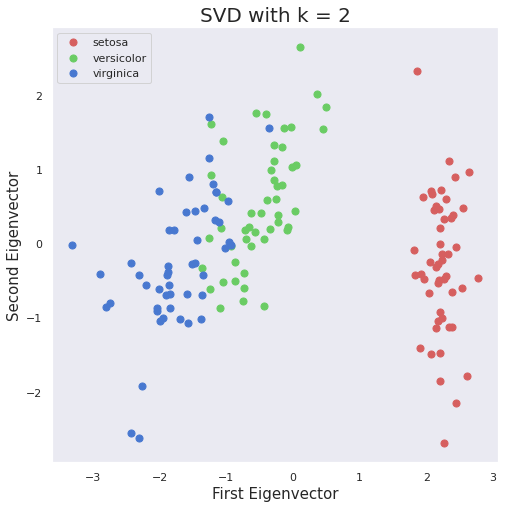

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Eigenvector', fontsize = 15)
ax.set_ylabel('Second Eigenvector', fontsize = 15)
ax.set_title('SVD with k = 2', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'First Eigenvector']
               , finalDf.loc[indicesToKeep, 'Second Eigenvector']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()